In this notebook I will attempt to identify the optimal goalscoring age for strikers from the 15/16 to 19/20 seasons.

Data for the following leagues will be analyzed:

1) English Premier League
2) Spanish La Liga
3) German Bundesliga
4) French Ligue 1
5) Italian Serie A

The data will be scraped from the FBRef website: https://fbref.com/en/

In [ ]:
import urllib.request
import pandas as pd


def get_df_from_url(url):
  '''
  This function takes a url and finds the table we need for analysis. This table 
  is used to set the dataframe which will be returned from the function

  url: URL containing the data
  return: Dataframe object.
  '''

  print("Start get_df_from_url")

  html_content = urllib.request.urlopen(url).read()

  # There are two header rows so only use the second
  html_table = pd.read_html(html_content, attrs={'id': 'stats_shooting'}, header=[1])

  df = html_table[0]

  print("Ended get_df_from_url")

  return df


def get_numeric_df(df):
  '''
  This function takes a dataframe and sets the columns to numeric 
  values as they are objects when scraped from the website

  df: DataFrame that contains the columns to be converted to numerical values.
  return: DataFrame of numeric values
  '''

  print("Start set_df_columns_to_numeric")

  df[['Age', 'Gls', '90s']] = df[['Age', 'Gls', '90s']].apply(pd.to_numeric)

  df = df[df['90s'] > 10][['Age', 'Gls']]

  print("Ended set_df_columns_to_numeric")

  return df


def get_filtered_df(df):
  '''
  This function takes a dataframe and returns the columns we are interested in. It 
  also filters out rows where the players position is not a striker.

  df: DataFrame to be filtered 
  return: Filtered dataframe object.
  '''

  print("Start get_filtered_df")
  
  filtered_df = df[df["Pos"] == "FW"][df['Gls'] != '0'][["Age", "Gls", "90s"]]
  filtered_df = filtered_df.dropna()

  print("Ended get_filtered_df")

  return filtered_df


# tuple of seasons we would like to scrape for
seasons_to_process = (
    "2015-2016",
    "2016-2017",
    "2017-2018",
    "2018-2019",
    "2019-2020"
)

master_df = pd.DataFrame()

for season in seasons_to_process:
  print("Processing ", season," season")

  # Insert current season to url so we can scrape the data
  url = "https://fbref.com/en/comps/Big5/{}/shooting/players/{}-Big-5-European-Leagues-Stats"
  season_url = url.format(season, season)

  df = get_df_from_url(season_url)

  print(df.head())

  filtered_df = get_filtered_df(df)

  numeric_df = get_numeric_df(filtered_df)

  master_df = master_df.append(numeric_df)
  

print(master_df)

Processing  2015-2016  season
Start get_df_from_url
Ended get_df_from_url
  Rk               Player   Nation    Pos  ... Dist PK PKatt  Matches
0  1  Patrick van Aanholt   nl NED     DF  ...  NaN  0     0  Matches
1  2       Rolando Aarons  eng ENG  DF,MF  ...  NaN  0     0  Matches
2  3        Ignazio Abate   it ITA     DF  ...  NaN  0     0  Matches
3  4    Christian Abbiati   it ITA     GK  ...  NaN  0     0  Matches
4  5      Aymen Abdennour   tn TUN     DF  ...  NaN  0     0  Matches

[5 rows x 21 columns]
Start get_filtered_df
Ended get_filtered_df
Start set_df_columns_to_numeric
Ended set_df_columns_to_numeric
Processing  2016-2017  season
Start get_df_from_url


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Ended get_df_from_url
  Rk               Player  Nation    Pos  ... Dist PK PKatt  Matches
0  1  Patrick van Aanholt  nl NED  DF,MF  ...  NaN  0     0  Matches
1  2  Patrick van Aanholt  nl NED  DF,MF  ...  NaN  0     0  Matches
2  3        Ignazio Abate  it ITA     DF  ...  NaN  0     0  Matches
3  4     Yunis Abdelhamid  ma MAR     DF  ...  NaN  0     0  Matches
4  5      Aymen Abdennour  tn TUN     DF  ...  NaN  0     0  Matches

[5 rows x 21 columns]
Start get_filtered_df
Ended get_filtered_df
Start set_df_columns_to_numeric
Ended set_df_columns_to_numeric
Processing  2017-2018  season
Start get_df_from_url


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Ended get_df_from_url
  Rk               Player   Nation    Pos  ... npxG/Sh  G-xG np:G-xG  Matches
0  1  Patrick van Aanholt   nl NED     DF  ...    0.09  +1.9    +1.9  Matches
1  2       Rolando Aarons  eng ENG  MF,FW  ...    0.07  -0.2    -0.2  Matches
2  3       Rolando Aarons  eng ENG  FW,MF  ...    0.08  -0.2    -0.2  Matches
3  4        Ignazio Abate   it ITA     DF  ...    0.07  +0.7    +0.7  Matches
4  5      Aymen Abdennour   tn TUN     DF  ...    0.04  -0.1    -0.1  Matches

[5 rows x 27 columns]
Start get_filtered_df
Ended get_filtered_df
Start set_df_columns_to_numeric
Ended set_df_columns_to_numeric
Processing  2018-2019  season
Start get_df_from_url


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Ended get_df_from_url
  Rk               Player  Nation Pos  ... npxG/Sh  G-xG np:G-xG  Matches
0  1        Ismael Aaneba  fr FRA  DF  ...     NaN   0.0     0.0  Matches
1  2  Patrick van Aanholt  nl NED  DF  ...    0.06  +0.3    +0.3  Matches
2  3        Ignazio Abate  it ITA  DF  ...    0.03   0.0     0.0  Matches
3  4          Issah Abbas  gh GHA  FW  ...    0.02   0.0     0.0  Matches
4  5     Yunis Abdelhamid  ma MAR  DF  ...    0.09  -1.7    -1.7  Matches

[5 rows x 27 columns]
Start get_filtered_df
Ended get_filtered_df
Start set_df_columns_to_numeric
Ended set_df_columns_to_numeric
Processing  2019-2020  season
Start get_df_from_url


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Ended get_df_from_url
  Rk               Player   Nation    Pos  ... npxG/Sh  G-xG np:G-xG  Matches
0  1  Patrick van Aanholt   nl NED     DF  ...    0.06  +0.6    +0.4  Matches
1  2           Max Aarons  eng ENG     DF  ...    0.04  -0.5    -0.5  Matches
2  3     Yunis Abdelhamid   ma MAR     DF  ...    0.07  +1.7    +1.7  Matches
3  4   Suleiman Abdullahi   ng NGA  FW,MF  ...    0.21  -0.3    -0.3  Matches
4  5          Mehdi Abeid   dz ALG     MF  ...    0.05  -0.6    -0.6  Matches

[5 rows x 27 columns]
Start get_filtered_df
Ended get_filtered_df
Start set_df_columns_to_numeric
Ended set_df_columns_to_numeric
      Age  Gls
21     28    4
23     34   20
26     22    4
28     28    1
29     28   13
...   ...  ...
2772   30    9
2775   27    8
2784   27   14
2812   28   18
2814   28    6

[900 rows x 2 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [ ]:
avg_df = master_df.groupby(['Age'], as_index=False).mean()

print(avg_df)

    Age        Gls
0    17   7.000000
1    18   6.333333
2    19   7.625000
3    20   7.566667
4    21   8.300000
5    22   7.428571
6    23   9.308824
7    24   9.621622
8    25   8.581395
9    26   9.239130
10   27  10.072289
11   28  10.871795
12   29  10.377049
13   30  10.228070
14   31  11.288889
15   32   8.566667
16   33   9.857143
17   34  14.083333
18   35  10.666667
19   36   7.200000
20   37   5.375000
21   38   6.000000
22   39   4.000000


Now that we have the data formatted and filtered as we need we can visualize

In [ ]:
%matplotlib inline
from pylab import *
import matplotlib.pyplot as plt

goals_data = avg_df["Gls"]
age_data = avg_df["Age"]

plt.scatter(age_data, goals_data)

plt.xlabel("Age")
plt.ylabel("Goals")
plt.show()

In [ ]:
goals_points = np.array(goals_data)
age_points = np.array(age_data)

polynomial_graph = np.poly1d(np.polyfit(age_points, goals_points, 5))

[17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


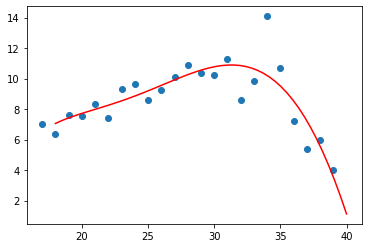

In [ ]:


xp = np.linspace(18, 40)
plt.scatter(age_points, goals_points)
plt.plot(xp, polynomial_graph(xp), c='r')
plt.show()

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(goals_points, polynomial_graph(age_points))

print(r2)

0.7086104426372035
